In [10]:
import seaborn as sns
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

from numpy import ndarray

%run hidden_neuron.py
%run input_neuron.py
%run input_layer.py
%run hidden_layer.py
%run output_neuron.py
%run output_layer.py
%run neural_network.py

from input_layer    import InputLayer
from hidden_layer   import HiddenLayer
from output_layer   import OtputLayer
from neural_network import SimpleNetwork


In [11]:
def show_matrix ( array: ndarray) -> None:
    "Visualise 2d matrix."

    size = tuple(int(x *0.3) for x in array.shape)

    _, ax = plt.subplots(figsize = size)
    
    sns.heatmap(
                array, 
                annot  = True, 
                cbar   = False, 
                cmap   = sns.cubehelix_palette(as_cmap=True),
                ax     = ax,
                
                xticklabels = False,
                yticklabels = False
    )


def plot_graph (adj_matrix: ndarray) -> None:
     "Plot graph from adjacency matrix."

     size  = tuple(int(x *0.5) for x in adj_matrix.shape)

     _, ax = plt.subplots(figsize = size)
    
     
     G = nx.from_numpy_array(adj_matrix)
     nx.draw(G, with_labels=True, node_size=300, node_color="skyblue", pos=nx.spring_layout(G), ax = ax)
     plt.show()
     

def matrix ( size: tuple, min: float|int, max: float|int, seed: int) -> ndarray:
    " Get random initialised 2d matrix."
    
    rng =  np.random.default_rng( seed = seed)
    
    if isinstance(min, int) and isinstance(max, int):
         return rng.integers(low = min, high =  max, size = size)
    else:
         return rng.random(low = min, high =  max, size = size)

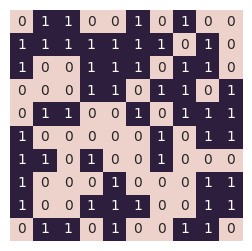

In [12]:
mat = matrix((10,10), min = 0, max = 2, seed = 42)
show_matrix(mat)

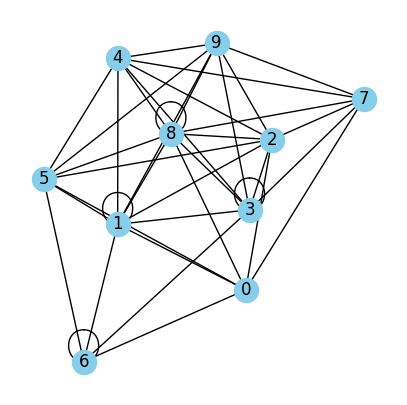

In [13]:
plot_graph(mat)

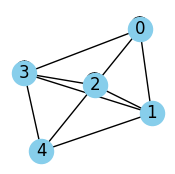

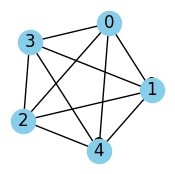

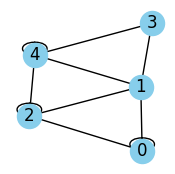

In [14]:
network_partition = [matrix((5,5), min = 0, max  = 2, seed = i) for i in range(3)]

for mat in network_partition:
    plot_graph(mat)

In [15]:
input      = InputLayer(1, network_partition)

layer_summary = pd.DataFrame(
[
 input[(1,1)],
 input[(1,2)],
 input[(1,3)]
 ]
 )

layer_summary

,neuron_id,features
0,"(1, 1)","[1.2, 0.9]"
1,"(1, 2)","[1.2, 1.0]"
2,"(1, 3)","[1.0, 0.7666666666666666]"


In [16]:
hidden = HiddenLayer(1, unit_count = 4, activation_function = 'sigmoid', input_layer = input)

layer_summary = pd.DataFrame(
[
 hidden[(1,1)],
 hidden[(1,2)],
 hidden[(1,3)]
 ]
 )

layer_summary

,neuron_id,weigths,features,output_value
0,"(1, 1)","[0.1037054816848133, 0.3267769618112186, 0.917...","[1.0, 1.2, 0.9]",0.789375
1,"(1, 2)","[0.9415940046140956, 0.6973261359866638, 0.193...","[1.0, 1.2, 1.0, 1.2, 0.9]",0.955392
2,"(1, 3)","[0.8021323122786594, 0.540187547764689, 0.1447...","[1.0, 1.0, 0.7666666666666666, 1.2, 0.9]",0.943151


In [17]:
output = OtputLayer(hidden)
layer_summary = pd.DataFrame(
output.properties()
 )

layer_summary

,input_vals,weights,output_val
0,0.789375,0.544683,0.827937
1,0.955392,0.091830,0.827937
2,0.943151,0.953431,0.827937


In [18]:
neural_net = SimpleNetwork(1, 4, network_partition = network_partition)

In [19]:
hidden_params = {}
output_params = {}

net_params = {'hidden_params': hidden_params, 'output_params': output_params}